- Pronob Sarker
 - Kate Anderson
 - Ha 
 - Logan 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [39]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [40]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [ ]:
# Your code here. Add cells as needed.
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

#coefficients and intercept
coef_ = model.coef_
intercept = model.intercept_
print("coefficients: " , coef_ )
print("intercept: " , intercept)

#predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 score: {r2:.2f}')

coefficients:  [-41732.69762962    206.9220434  103236.95875143]
intercept:  -592758.1153276186
Mean Squared Error: 62002256049.32
R2 score: 0.55


#### Your written answers here

What are your model parameters?
 - 

What were your MSE and R^2?

 -The Mean Squared Error: 62002256049.32 and R2 score: 0.55



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [ ]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y


print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


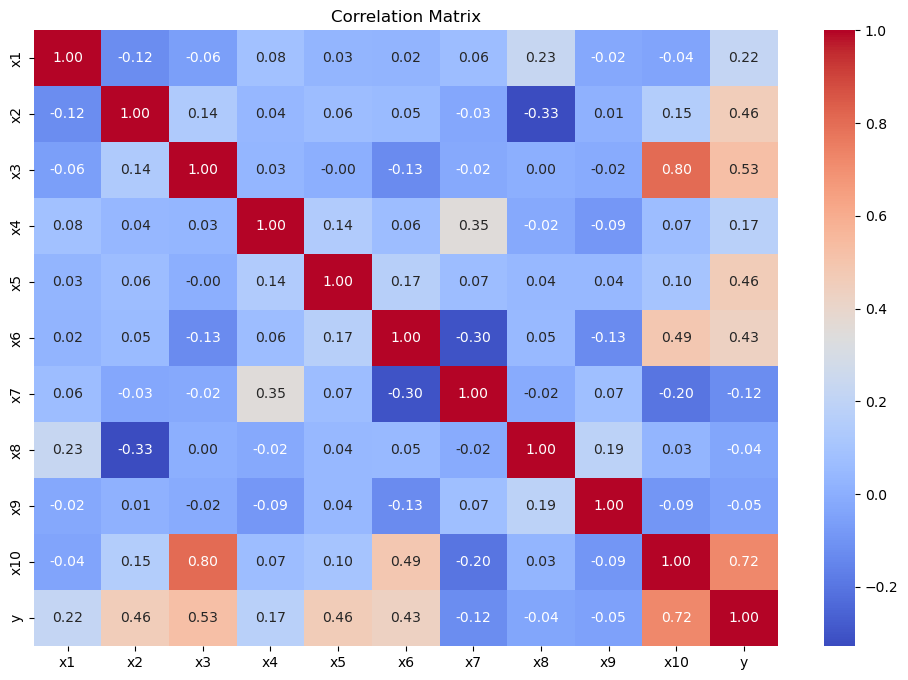

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(reg2_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [57]:
10,6,5,3,2 
idx = [0, 1, 3, 4, 9]

candidate_idx = [1, 2, 4, 5, 9]  # x2=1, x3=2, x5=4, x6=5, x10=9
Z = X.iloc[:, candidate_idx]   # Select columns x2, x3, x5, x6, x10
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=5)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

# Predict and calculate metrics
y_pred = model_LR.predict(Z_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 score: {r2:.2f}')


IndexError: positional indexers are out-of-bounds

#### Your written answers here

What are your model parameters?
 - coefficient:
 - intercept: 

Which features (x1, x2...) were significant? Which were co-linear?
 - Significant feature: x10,x6,x5,x3,x2.
- co-linear  feature: x3 and x10, y and x10
 
What were your MSE and R^2?
 - 



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [ ]:
housing_df = pd.read_csv('kc_house_data.csv')


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


In [ ]:
# Your code here. Add cells as needed.

#drop columns id,date and zipcode
housing_df = housing_df.drop(columns=['id', 'date', 'zipcode'], inplace=True) 
housing_corr = housing_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(housing_corr, annot=True, center=0, fmt='.2f') #plot heatmap
plt.show()


KeyError: "['id', 'date', 'zipcode'] not found in axis"

#### Your written answers here
Which features are you using and why?
 
 - Your written answer here.

 bedrooms, sqft_living, 

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [45]:
# Your code here. Add cells as needed.
X = housing_df[['bathrooms', 'sqft_living', 'grade']]
y= housing_df['price']


X_traun, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 15) 

### Your written answers here
Which regression did you use?
 - Your answer

Does your regularized model look better than your MLR? How so?
 - Your answer

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [46]:
# Your code here. Add cells as needed.

 ### Your written answers here

 What are the $R^2$ for the two models?

  - Your answer
 
